# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1135.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.09e-43
Time:                        18:53:35   Log-Likelihood:                 6.8074
No. Observations:                  50   AIC:                            -5.615
Df Residuals:                      46   BIC:                             2.033
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1024      0.075     67.995      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.63005539  5.0820064   5.4981435   5.85379773  6.13320301  6.33208651
  6.45837062  6.53087133  6.57620685  6.62442427  6.70406292  6.83746548
  7.03710706  7.30354565  7.62533042  7.98088303  8.34204294  8.67869405
  8.96371276  9.17742423  9.31083494  9.36711031  9.36105459  9.31667859
  9.26325478  9.2305079   9.24373123  9.31963104  9.46358175  9.66874297
  9.9171833  10.18282644 10.43573549 10.64703141 10.79363785 10.86207248
 10.85066211 10.76981759 10.64032335 10.48992256 10.34875901 10.24442457
 10.19742594 10.21781542 10.30353939 10.44077569 10.60620454 10.77083999
 10.90479211 10.98217796]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.97496553 10.84783364 10.61853347 10.3275177  10.0280363   9.77309908
  9.60249701  9.53306004  9.55453653  9.63210319]


## Plot comparison

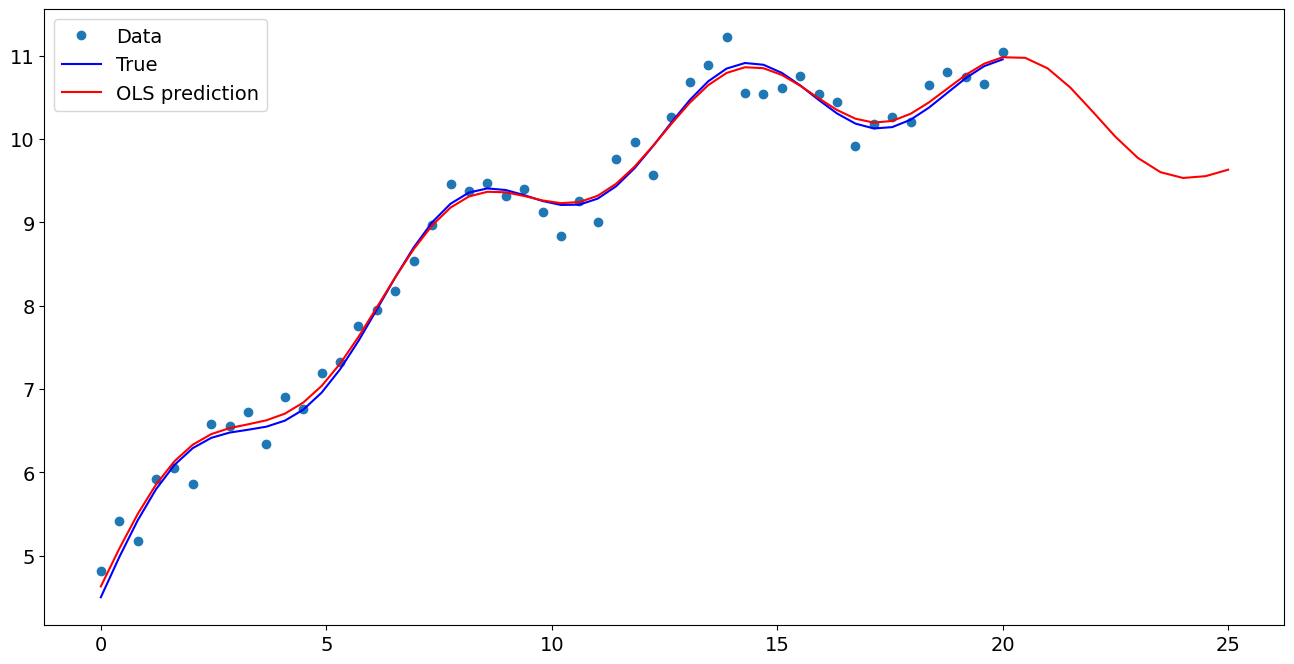

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.102384
x1                  0.485875
np.sin(x1)          0.452649
I((x1 - 5) ** 2)   -0.018893
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.974966
1    10.847834
2    10.618533
3    10.327518
4    10.028036
5     9.773099
6     9.602497
7     9.533060
8     9.554537
9     9.632103
dtype: float64